In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import necessary elements of ML model
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [6]:
#read in status.csv
status = pd.read_csv('status.csv',
                     usecols = [0, 1, 3],
                     parse_dates = [2])

#take a sample of 5e6 entries to make testing and computation faster. 
sample_size = 5000000
status_sample = status.sample(n = sample_size, random_state = 42)

#empty the original df
status = pd.DataFrame()

#look at the attributes of the sample df
status_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000000 entries, 2231123 to 55218283
Data columns (total 3 columns):
 #   Column           Dtype         
---  ------           -----         
 0   station_id       int64         
 1   bikes_available  int64         
 2   time             datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 152.6 MB


In [9]:
#break down the datetime into its individual features and drop the original datetime
status_sample['dayofweek'] = status_sample['time'].dt.dayofweek
status_sample['hour'] = status_sample['time'].dt.hour
status_sample['minute'] = status_sample['time'].dt.minute
status_sample['min_in_day'] = status_sample['hour']*60+status_sample['minute']
status_sample.drop('hour', axis = 1, inplace = True)
status_sample.drop('minute', axis = 1, inplace = True)
status_sample['dayofyear'] = status_sample['time'].dt.dayofyear
status_sample['year'] = status_sample['time'].dt.year

status_sample.drop('time', axis = 1, inplace = True)

#convert station_id and year to categeoricals, teh one-hot encode them
status_sample[['station_id', 'year', 'dayofweek']] = status_sample[['station_id', 'year', 'dayofweek']] .astype('category')
status_sample = pd.get_dummies(status_sample)

status_sample['min_in_day'] = (status_sample['min_in_day'] - status_sample['min_in_day'].mean())/status_sample['min_in_day'].std()
status_sample['dayofyear'] = (status_sample['dayofyear'] - status_sample['dayofyear'].mean())/status_sample['dayofyear'].std()

status_sample

KeyError: 'time'

In [11]:
ba_mean = status_sample['bikes_available'].mean()
ba_std = status_sample['bikes_available'].std()
print("Mean: {:.3f}".format(ba_mean))
print("Stndard Dev.: {:.3f}".format(ba_std))

Mean: 8.397
Stndard Dev.: 3.995


In [12]:
X = status_sample.drop('bikes_available', axis = 1)
y = status_sample['bikes_available']

X = X.values
y = y.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [14]:
model = Sequential()

model.add(Dense(32, input_shape = (82,), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

In [15]:
history = model.fit(X_train, y_train, 
                    epochs = 15,
                    validation_data = (X_test, y_test),
                    callbacks = [early_stopping])


Train on 4000000 samples, validate on 1000000 samples
Epoch 1/15
4000000/4000000 [==============================] - 122s 30us/step - loss: 9.6866 - mse: 9.6867 - val_loss: 9.2740 - val_mse: 9.2740
Epoch 2/15
4000000/4000000 [==============================] - 108s 27us/step - loss: 9.1341 - mse: 9.1340 - val_loss: 9.0059 - val_mse: 9.0059
Epoch 3/15
4000000/4000000 [==============================] - 106s 27us/step - loss: 8.9935 - mse: 8.9935 - val_loss: 8.9917 - val_mse: 8.9916
Epoch 4/15
4000000/4000000 [==============================] - 109s 27us/step - loss: 8.9036 - mse: 8.9036 - val_loss: 8.8430 - val_mse: 8.8430
Epoch 5/15
4000000/4000000 [==============================] - 104s 26us/step - loss: 8.8322 - mse: 8.8322 - val_loss: 8.8732 - val_mse: 8.8732
Epoch 6/15
4000000/4000000 [==============================] - 102s 26us/step - loss: 8.7813 - mse: 8.7813 - val_loss: 8.7398 - val_mse: 8.7398
Epoch 7/15
4000000/4000000 [==============================] - 106s 26us/step - loss: 8.

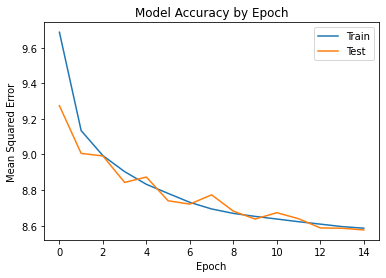

In [19]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend({'Train', 'Test'})

plt.savefig('model_acc.png', dpi=300)

<Figure size 432x288 with 0 Axes>